# Sleep-EDF Dataset Exploration Notebook (Complete)

This notebook explores the Sleep-EDF dataset using your `SleepEDFDataset` loader. It covers:
1. Data path
2. Dataset structure and basic stats
3. Sample shapes and label info
4. Mapping numeric labels to sleep stages
5. Distribution of sleep stages
6. Hypnogram over time
7. Example EEG epochs for each stage

In [1]:
import os
import sys
import mne
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append(os.path.dirname(os.getcwd()))
from time_series_datasets.sleep_edf.sleepedf_loader import SleepEDFDataset, get_sleepedf_data

# Initialize and show data path
data_path = get_sleepedf_data()
print(f"Sleep-EDF data directory: {data_path}")
dataset = SleepEDFDataset(data_dir=data_path)


Sleep-EDF data directory: /Users/planger/Development/EmbedHealth/time_series_datasets/raw_data/sleep-edf-database-1.0.0/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette


## 2. Dataset Structure and Basic Stats

In [2]:
# Number of recordings
num_recs = len(dataset)
print(f"Number of recordings: {num_recs}")

# First few PSG file names
print(dataset.data_files[:5])

Number of recordings: 8
['SC4002E0-PSG.edf', 'SC4031E0-PSG.edf', 'SC4022E0-PSG.edf', 'SC4011E0-PSG.edf', 'SC4021E0-PSG.edf']


## 3. Sample Shape and Label Info

In [3]:
data, labels = dataset[0]
print(f"Epoch data shape: {data.shape}  (n_epochs, 1, n_times)")
print(f"Labels shape: {labels.shape}")
print(f"Unique labels: {np.unique(labels)}")

Extracting EDF parameters from /Users/planger/Development/EmbedHealth/time_series_datasets/raw_data/sleep-edf-database-1.0.0/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4002E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8489999  =      0.000 ... 84899.990 secs...


/Users/planger/Development/EmbedHealth/time_series_datasets/sleep_edf/sleepedf_loader.py:85: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True)
/Users/planger/Development/EmbedHealth/time_series_datasets/sleep_edf/sleepedf_loader.py:85: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True)
/Users/planger/Development/EmbedHealth/time_series_datasets/sleep_edf/sleepedf_loader.py:85: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_path, preload=True)


Used Annotations descriptions: [np.str_('Movement time'), np.str_('Sleep stage 1'), np.str_('Sleep stage 2'), np.str_('Sleep stage 3'), np.str_('Sleep stage 4'), np.str_('Sleep stage ?'), np.str_('Sleep stage R'), np.str_('Sleep stage W')]
Not setting metadata
151 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 151 events and 3000 original time points ...
0 bad epochs dropped
Epoch data shape: (151, 1, 3000)  (n_epochs, 1, n_times)
Labels shape: (151,)
Unique labels: [1 2 3 4 5 7 8]


/Users/planger/Development/EmbedHealth/time_series_datasets/sleep_edf/sleepedf_loader.py:87: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(ann)


## 4. Mapping Numeric Labels to Sleep Stages

In [4]:
# Load raw and annotations for the first recording
psg_file = dataset.data_files[0]
raw = mne.io.read_raw_edf(os.path.join(data_path, psg_file), preload=True)
# Find matching Hypnogram file
prefix = psg_file.split('-')[0][:6]
hyp_files = [f for f in os.listdir(data_path)
             if f.startswith(prefix) and f.endswith('Hypnogram.edf')]
hyp = hyp_files[0]
ann = mne.read_annotations(os.path.join(data_path, hyp))
raw.set_annotations(ann)
# Extract mapping
events, event_id = mne.events_from_annotations(raw)
code_to_stage = {code: desc for desc, code in event_id.items()}
print(code_to_stage)

Extracting EDF parameters from /Users/planger/Development/EmbedHealth/time_series_datasets/raw_data/sleep-edf-database-1.0.0/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4002E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8489999  =      0.000 ... 84899.990 secs...


/var/folders/yc/_4f75pks3hd30p8j5f4skklw0000gs/T/ipykernel_79037/3807554019.py:3: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_path, psg_file), preload=True)
/var/folders/yc/_4f75pks3hd30p8j5f4skklw0000gs/T/ipykernel_79037/3807554019.py:3: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_path, psg_file), preload=True)
/var/folders/yc/_4f75pks3hd30p8j5f4skklw0000gs/T/ipykernel_79037/3807554019.py:3: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_path, psg_file), preload=True)


Used Annotations descriptions: [np.str_('Movement time'), np.str_('Sleep stage 1'), np.str_('Sleep stage 2'), np.str_('Sleep stage 3'), np.str_('Sleep stage 4'), np.str_('Sleep stage ?'), np.str_('Sleep stage R'), np.str_('Sleep stage W')]
{1: np.str_('Movement time'), 2: np.str_('Sleep stage 1'), 3: np.str_('Sleep stage 2'), 4: np.str_('Sleep stage 3'), 5: np.str_('Sleep stage 4'), 6: np.str_('Sleep stage ?'), 7: np.str_('Sleep stage R'), 8: np.str_('Sleep stage W')}


/var/folders/yc/_4f75pks3hd30p8j5f4skklw0000gs/T/ipykernel_79037/3807554019.py:10: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(ann)


## 5. Distribution of Sleep Stages

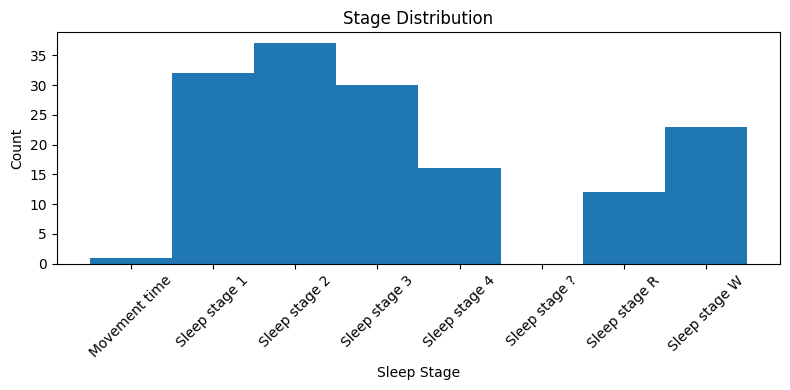

In [5]:
plt.figure(figsize=(8,4))
plt.hist(labels, bins=np.arange(labels.min(), labels.max()+2)-0.5)
plt.xticks(sorted(code_to_stage.keys()), [code_to_stage[k] for k in sorted(code_to_stage.keys())], rotation=45)
plt.xlabel('Sleep Stage')
plt.ylabel('Count')
plt.title('Stage Distribution')
plt.tight_layout()
plt.show()

## 6. Hypnogram Over Time

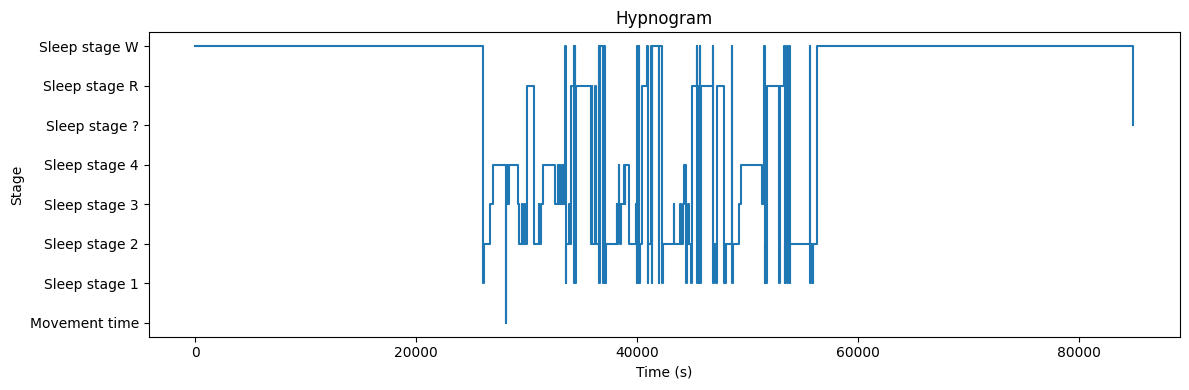

In [6]:
sfreq = raw.info['sfreq']
times = events[:,0] / sfreq
stages = events[:,2]
plt.figure(figsize=(12,4))
plt.step(times, stages, where='post')
plt.yticks(sorted(code_to_stage.keys()), [code_to_stage[k] for k in sorted(code_to_stage.keys())])
plt.xlabel('Time (s)')
plt.ylabel('Stage')
plt.title('Hypnogram')
plt.tight_layout()
plt.show()

## 7. Example EEG Epochs for Each Stage

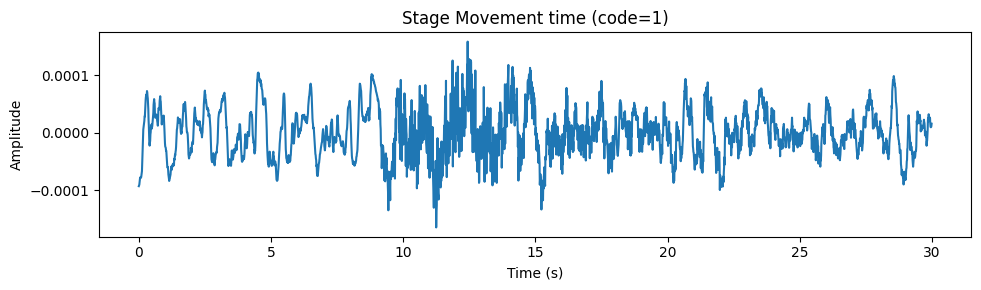

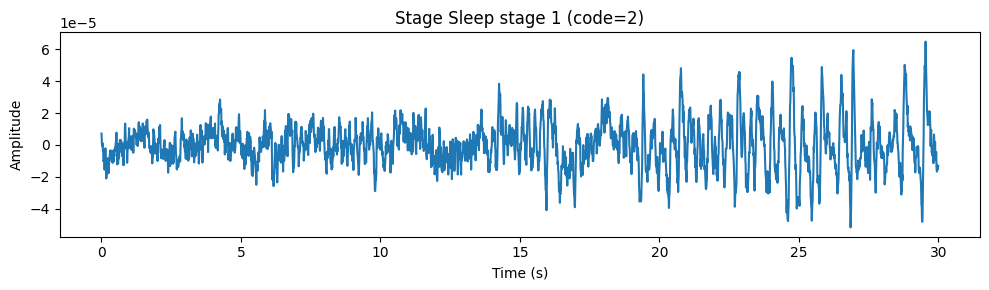

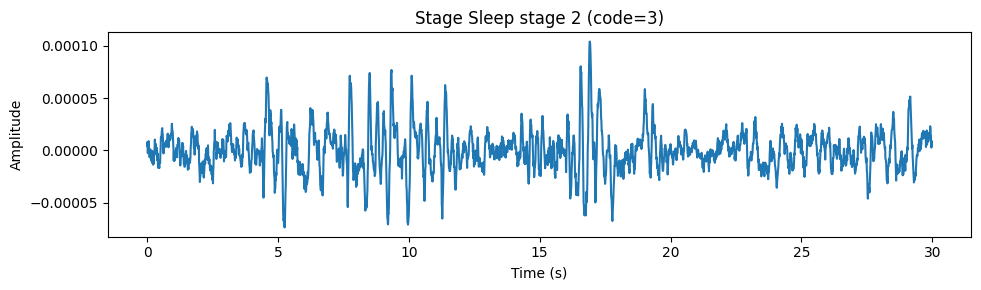

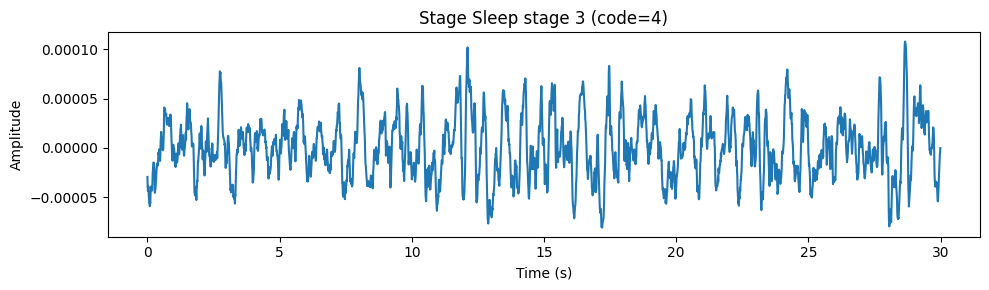

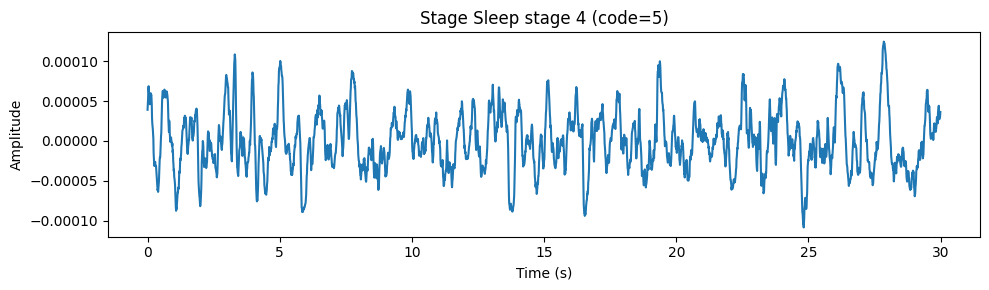

IndexError: index 0 is out of bounds for axis 0 with size 0

In [10]:
for code in sorted(code_to_stage.keys()):
    idx = np.where(labels==code)[0][0]
    epoch = data[idx,0,:]
    t = np.arange(epoch.size)/sfreq
    plt.figure(figsize=(10,3))
    plt.plot(t, epoch)
    plt.title(f"Stage {code_to_stage[code]} (code={code})")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()